# Lab 5 | EDA & Visualisation

In [9]:
import pandas as pd
df = pd.read_csv("../data/students.csv")
df.head()

,student_id,age,gpa,gender,major,year
0,1,14,NaN,F,Economics,freshman
1,2,17,2.92,M,History,senior
2,3,17,2.97,F,Physics,senior
3,4,16,2.76,F,Physics,junior
4,5,16,2.24,M,Chemistry,junior


In [10]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64

### Which column has the most missing values and why might that be?
Answer: GPA has the most missing values as it is the hardest to gather (needing all of the courses and the grades to calculate)

In [30]:
import statistics
age_count = len(df['age'])
age_mean = df['age'].mean()
age_median = df['age'].median()
age_variance = df['age'].var()
age_SD = df['age'].std
age_min = min(df['age'])
age_max = max(df['age'])

gpa_count = df['gpa']
gpa_mean = df['gpa'].mean()
gpa_median = df['gpa'].median()
gpa_variance = df['gpa'].var()
gpa_SD = df['gpa'].std()
gpa_min = min(df['gpa'])
gpa_max = max(df['gpa'])



dicts = {'count': [age_count, gpa_count], "mean": [age_mean, gpa_mean], "median": [age_median, gpa_median], "variance": [age_variance, gpa_variance], "SD": [age_SD, gpa_SD], "min": [age_min, gpa_min], "max": [age_max, gpa_max]}
print(pd.DataFrame(dicts, index = ['gpa', 'age']))

                                                 count       mean  median  \
gpa                                                 95  16.136842   16.00   
age  0      NaN
1     2.92
2     2.97
3     2.76
4 ...   2.627412    2.67   

     variance                                                 SD   min   max  
gpa  1.970437  <bound method Series.std of 0     14\n1     17...  14.0  18.0  
age  0.229993                                           0.479576   NaN   NaN  


<Axes: >

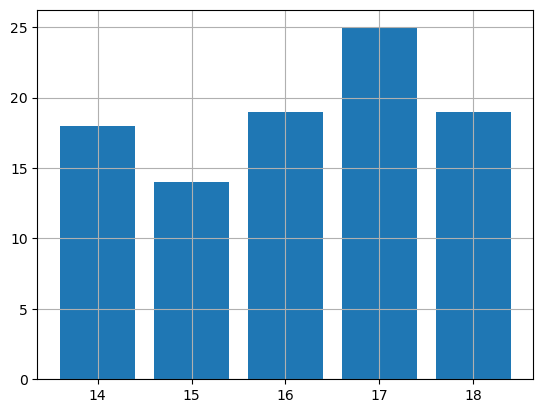

In [19]:
df['age'].hist(bins=range(14,20),align='left',rwidth=0.8)

<Axes: xlabel='gpa', ylabel='Count'>

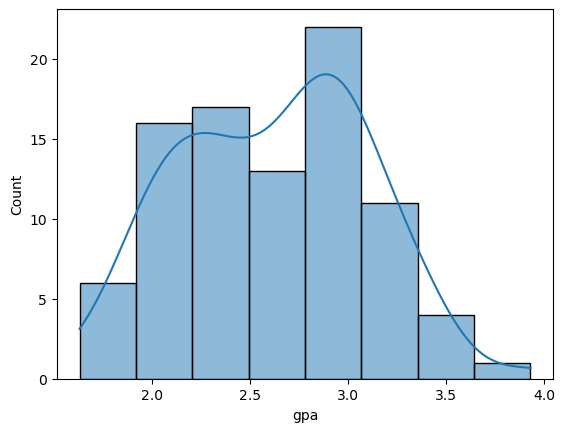

In [12]:
import seaborn as sns
sns.histplot(df["gpa"], kde = True)

### Interesting Feautures of Each Distribution
The first histogram has an disproportionate distribution while the second shows a clear trend and average.

<Axes: xlabel='age', ylabel='gpa'>

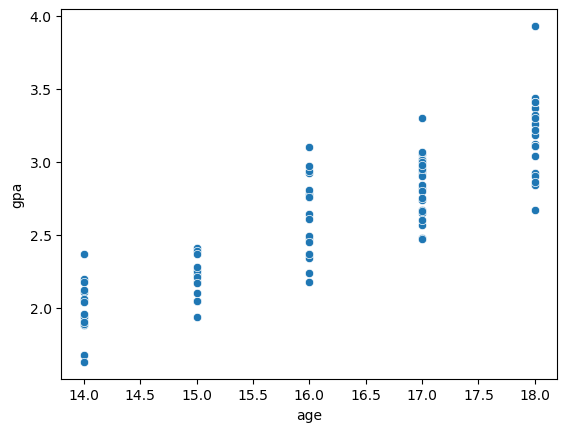

In [13]:
sns.scatterplot(x = "age", y = "gpa", data = df)

In [14]:
df["age"].corr(df["gpa"])

np.float64(0.8786075344584666)

### Trends of GPA and Age
GPA has a proportional trend with age in this mini dataset with a correlation of approximately 0.87.

In [15]:
import numpy
df["major"] = df["major"].str.lower()
df["major"] = df["major"].str.strip()
df["major"].replace("", None)
df = df.dropna(subset = "major")

In [16]:
df.to_csv("../data/students_clean.csv", index = False)

## Conclusion
Findings: In this data file, the gpa and age are strongly correlated. GPA has a somewhat even distribution, and age is unevenly distributed. The data file is cleaned through removing empty majors and making the format even.